# Task # 2

In [1]:
import pandas as pd

day_data = pd.read_csv("E:\\Internship\\Week 6\\archive\\day.csv")
hour_data = pd.read_csv("E:\\Internship\\Week 6\\archive\\hour.csv")

# checking the data is loaded succesfully by printing some rows

print(day_data.head())
print(hour_data.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

In [3]:
print(day_data.isnull().sum())
print(hour_data.isnull().sum())

# Converting the 'dteday' column in the datasets to datetime
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


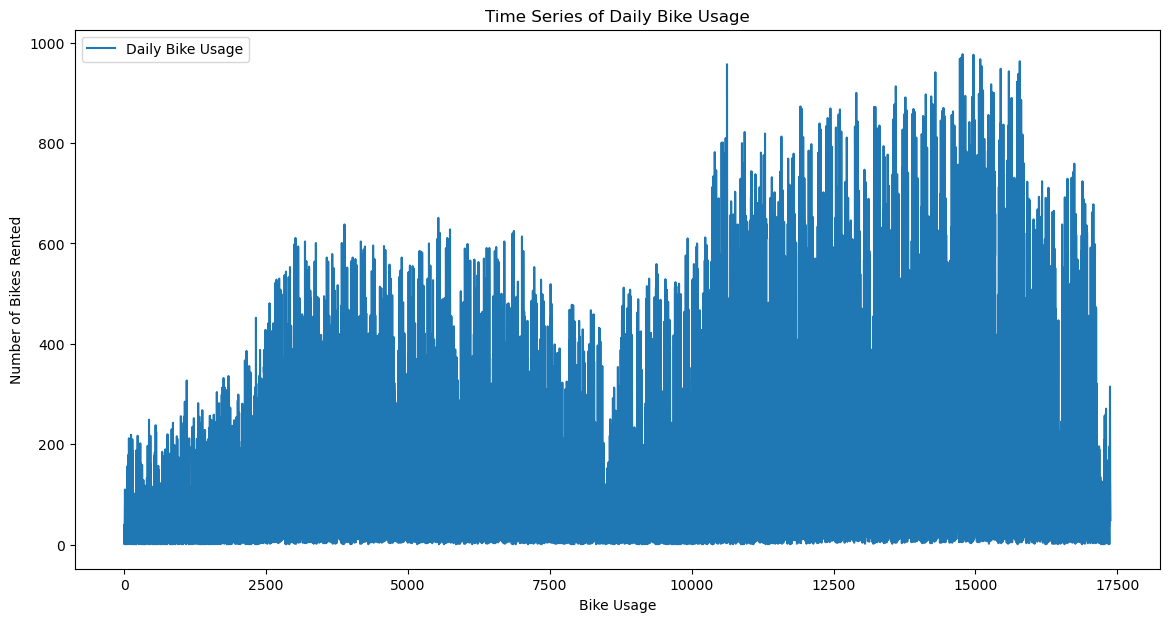

Peak usage : 14773


In [5]:
import matplotlib.pyplot as plt

# Plot the historical data to observe trends
plt.figure(figsize=(14, 7))
plt.plot(hour_data['cnt'], label='Daily Bike Usage')
plt.title('Time Series of Daily Bike Usage')
plt.xlabel('Bike Usage')
plt.ylabel('Number of Bikes Rented')
plt.legend()
plt.show()

# Identify peak usage times
peak_times = hour_data['cnt'].idxmax()
print(f'Peak usage : {peak_times}')


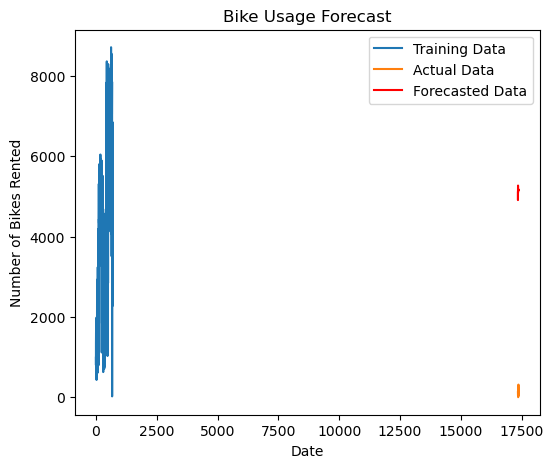

In [7]:
# Forcasting Model
from statsmodels.tsa.arima.model import ARIMA

# Split the data into training and testing sets
train_data = day_data['cnt'][:-30]  # Using all but the last 30 days for training
test_data = hour_data['cnt'][-30:]  # Last 30 days for testing

# Build the ARIMA model
model = ARIMA(train_data, order=(5, 1, 0))  
model_fit = model.fit()

# Forecast the future values
forecast = model_fit.forecast(steps=30)  # Forecasting for the next 30 days


plt.figure(figsize=(6, 5))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Actual Data')
plt.plot(test_data.index, forecast, label='Forecasted Data', color='red')
plt.title('Bike Usage Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Bikes Rented')
plt.legend()
plt.show()


# Visulaization

In [9]:
# Historical trends plot
plt.figure(figsize=(14, 7))
plt.plot(hour_data['cnt'], label='Historical Data')
plt.title('Historical Bike Usage Trends')
plt.xlabel('Date')
plt.ylabel('Number of Bikes Rented')
plt.legend()
plt.show()

# Forecast plot (from the previous step)
